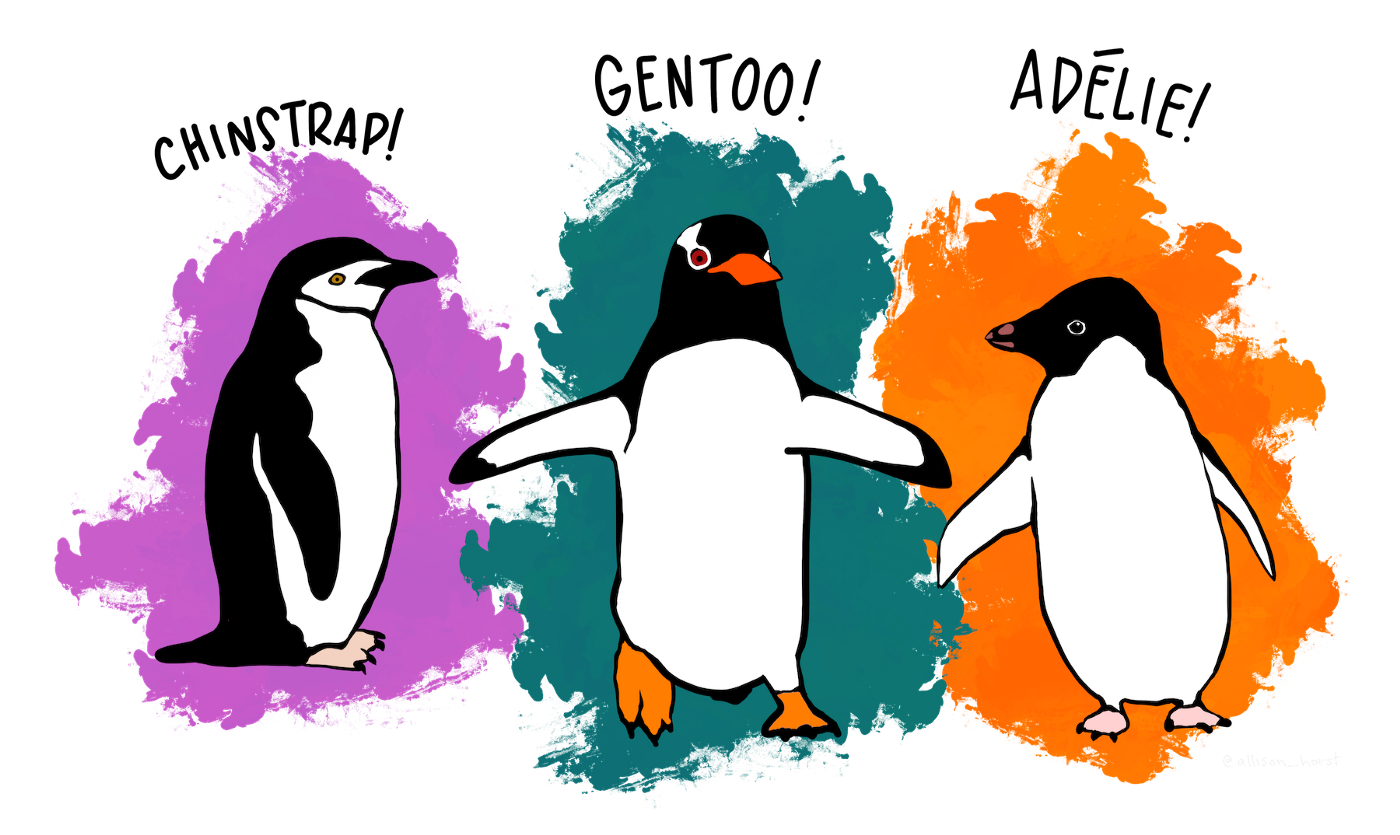

#Data Preprocesing

In [27]:
import pandas as pd
import numpy as nm


In [28]:
dataset = pd.read_csv("/content/penguins.csv")

In [29]:
dataset.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender,year
0,1,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,5,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,6,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [30]:
dataset.shape

(338, 9)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              338 non-null    int64  
 1   species            338 non-null    object 
 2   island             338 non-null    object 
 3   bill_length_mm     338 non-null    float64
 4   bill_depth_mm      338 non-null    float64
 5   flipper_length_mm  338 non-null    int64  
 6   body_mass_g        338 non-null    int64  
 7   Gender             329 non-null    object 
 8   year               338 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 23.9+ KB


In [32]:
dataset.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,173.035503,43.930769,17.161834,200.869822,4196.671598,2008.029586
std,99.649051,5.480389,1.963191,14.091927,803.468705,0.814746
min,1.000000,32.100000,13.200000,172.000000,2700.000000,2007.000000
25%,86.250000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4025.000000,2008.000000
75%,258.750000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [33]:
dataset["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [34]:
dataset["island"].value_counts()

Biscoe       163
Dream        124
Torgersen     51
Name: island, dtype: int64

In [35]:
dataset["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [35]:
dataset["island"].unique()

In [36]:
from sklearn.preprocessing import LabelEncoder

dataset["island"] = LabelEncoder().fit_transform(dataset["island"])

In [46]:
dataset["island"].unique()

array([2, 0, 1])

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              338 non-null    int64  
 1   species            338 non-null    object 
 2   island             338 non-null    int64  
 3   bill_length_mm     338 non-null    float64
 4   bill_depth_mm      338 non-null    float64
 5   flipper_length_mm  338 non-null    int64  
 6   body_mass_g        338 non-null    int64  
 7   Gender             329 non-null    object 
 8   year               338 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 23.9+ KB


#Data Spliting

In [38]:
dataset.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'Gender', 'year'],
      dtype='object')

In [39]:
X = dataset[['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'year']]   # features
Y = dataset["species"]                             #target

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 0)

#Training Phase

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)

y_pred = rf.predict(X_test) #model predicted

In [56]:
df=pd.DataFrame({
    "island" :[int(input("island no : "))],
    "bill_length_mm" : [int(input("bill_length_mm : "))],
    "bill_depth_mm"  : [int(input("bill_depth_mm : "))],
    "flipper_length_mm":[int(input("flipper_length_mm : "))],
    "body_mass_g":    [int(input("body_mass_g : "))],
    "year"       :   [int(input("year : "))]
    
})

input:2


In [55]:
print(rf.predict(df))

['Adelie']


#Accuracy

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

1.0


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,Y_train)

y_pred = gb.predict(X_test) #model predicted

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

1.0
